### Newton's Method and Gradient Descent on the Rosenbrock Function

In this section, we implement and compare three optimization algorithms applied to the Rosenbrock function:

$$
f(x) = 100(x_2 - x_1^2)^2 + (1 - x_1)^2
$$

We will evaluate the following methods:

1. **Newton’s method with fixed step size** $\lambda^\nu = 1$
2. **Newton’s method with Armijo step size**, using parameters $\alpha = \beta = 0.8$
3. **Gradient descent with Armijo step size**, using the same Armijo parameters

Starting from the point $x^0 = (-1.2, 1)$, each method iterates until it finds a point $x^\nu$ such that:

$$
\|\nabla f(x^\nu)\|_2 \leq 10^{-7}
$$

The number of iterations and convergence behavior for each method will be recorded and compared.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Rosenbrock function
def rosenbrock(x):
    x1, x2 = x
    return 100 * (x2 - x1**2)**2 + (1 - x1)**2

# Gradient of Rosenbrock
def grad_rosenbrock(x):
    x1, x2 = x
    return np.array([
        -400 * x1 * (x2 - x1**2) - 2 * (1 - x1),
         200 * (x2 - x1**2)
    ])

# Hessian of Rosenbrock
def hess_rosenbrock(x):
    x1, x2 = x
    return np.array([
        [1200 * x1**2 - 400 * x2 + 2, -400 * x1],
        [-400 * x1, 200]
    ])

# Newton’s method (with optional Armijo step size)
def newton_method(x0, alpha=0.8, beta=0.8, armijo=False, tol=1e-7, max_iter=10000):
    x = x0.copy()
    path = [x.copy()]
    for i in range(max_iter):
        grad = grad_rosenbrock(x)
        hess = hess_rosenbrock(x)
        p = -np.linalg.solve(hess, grad)
        t = 1.0
        if armijo:
            while rosenbrock(x + t * p) > rosenbrock(x) + alpha * t * grad @ p:
                t *= beta
        x += t * p
        path.append(x.copy())
        if np.linalg.norm(grad) < tol:
            break
    return np.array(path), i + 1

# Gradient Descent with Armijo rule
def gradient_descent(x0, alpha=0.8, beta=0.8, tol=1e-7, max_iter=10000):
    x = x0.copy()
    path = [x.copy()]
    for i in range(max_iter):
        grad = grad_rosenbrock(x)
        p = -grad
        t = 1.0
        while rosenbrock(x + t * p) > rosenbrock(x) + alpha * t * grad @ p:
            t *= beta
        x += t * p
        path.append(x.copy())
        if np.linalg.norm(grad) < tol:
            break
    return np.array(path), i + 1

# Example usage:
x0 = np.array([-1.2, 1.0])
path, iters = newton_method(x0, armijo=True)
print(f"Newton with Armijo converged in {iters} iterations")

# Newton with fixed step size 1
path_fixed, iters_fixed = newton_method(x0, armijo=False)
print(f"Newton without Armijo converged in {iters_fixed} iterations")

# Gradient descent with Armijo rule
path_gd, iters_gd = gradient_descent(x0)
print(f"Gradient descent with Armijo converged in {iters_gd} iterations")


Newton with Armijo converged in 75 iterations
Newton without Armijo converged in 7 iterations
Gradient descent with Armijo converged in 1132 iterations


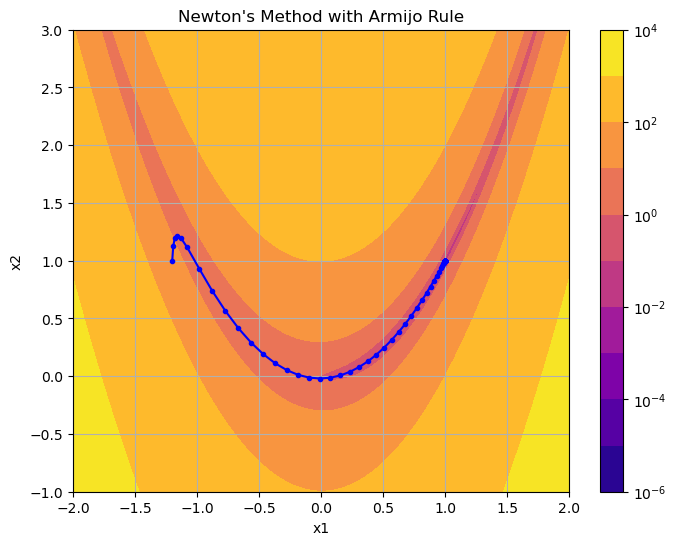

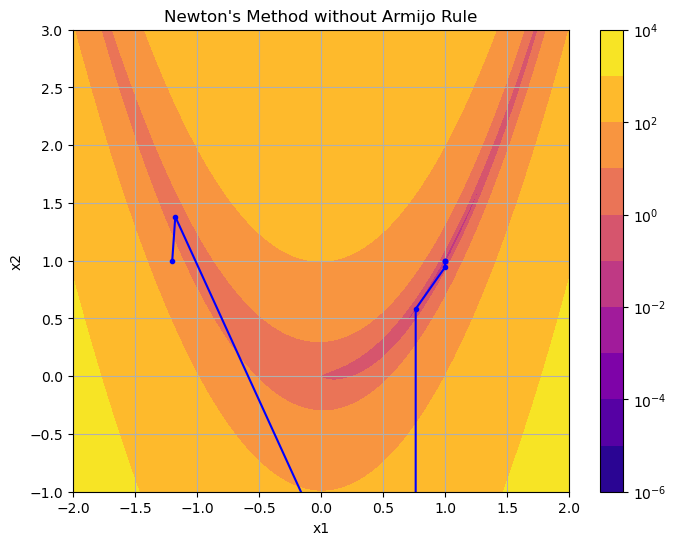

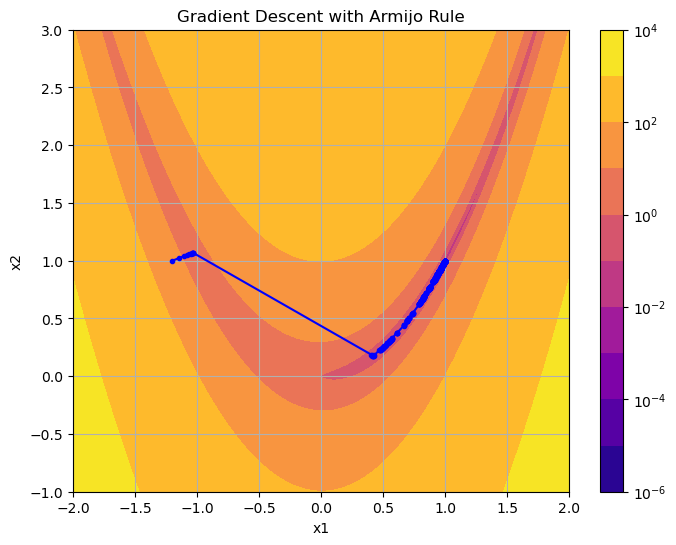

In [22]:
# Plot the paths nicely with countour plot but clear colors
from matplotlib.colors import LogNorm
def plot_rosenbrock(path, title):
    x1 = np.linspace(-2, 2, 400)
    x2 = np.linspace(-1, 3, 400)
    X1, X2 = np.meshgrid(x1, x2)
    Z = rosenbrock([X1, X2])
    
    plt.figure(figsize=(8, 6))
    plt.contourf(X1, X2, Z, levels=50, cmap='plasma', norm=LogNorm())
    plt.colorbar()
    plt.plot(path[:, 0], path[:, 1], 'b-', marker='o', markersize=3)
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(-2, 2)
    plt.ylim(-1, 3)
    plt.grid()
    plt.show()

# Plot the paths
plot_rosenbrock(path, "Newton's Method with Armijo Rule")
plot_rosenbrock(path_fixed, "Newton's Method without Armijo Rule")
plot_rosenbrock(path_gd, "Gradient Descent with Armijo Rule")

